In [41]:
import networkx as nx


In [42]:
nx.__version__

'2.6.3'

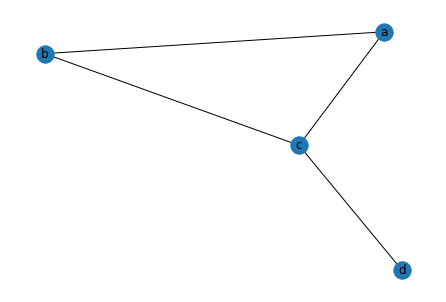

In [43]:

G = nx.Graph()

G.add_node('a')

nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

G.add_edge('a', 'b')

edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

nx.draw(G, with_labels=True)

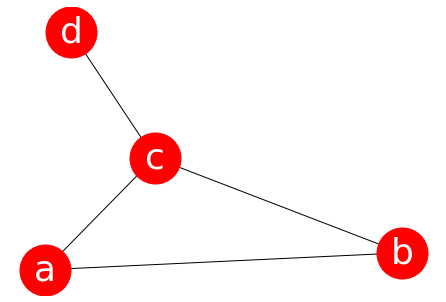

In [44]:
nx.draw(G,
        with_labels=True,
        node_size=2600,
        node_color='red',
        font_color='white',
        font_size=36,
        )

In [45]:
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [46]:
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

In [47]:
for node in G.nodes:
    print(node)

a
b
c
d


In [48]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


In [49]:
G.number_of_nodes()

4

In [50]:
G.number_of_edges()

4

In [51]:
G.neighbors('c')

In [52]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c


In [53]:
list(G.neighbors('b'))

['a', 'c']

In [54]:
nx.is_tree(G)

False

In [55]:
nx.is_connected(G)

True

In [56]:
G.has_node('a')

True

In [57]:
G.has_node('x')

False

In [58]:
'c' in G.nodes

True

In [59]:
G.has_edge('a', 'b')

True

In [60]:
G.has_edge('a', 'd')

False

In [61]:
('c', 'd') in G.edges

True

In [62]:
len(list(G.neighbors('a')))

2

In [63]:
G.degree('b')

2

In [64]:
items = ['spider', 'y', 'banana']
[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']

In [65]:
print(G.nodes())
print([G.degree(n) for n in G.nodes()])

['a', 'b', 'c', 'd']
[2, 2, 3, 1]


In [66]:
g = (len(item) for item in items)
list(g)

[6, 1, 6]

In [67]:
max(len(item) for item in items)

6

In [68]:
sorted(item.upper() for item in items)

['BANANA', 'SPIDER', 'Y']

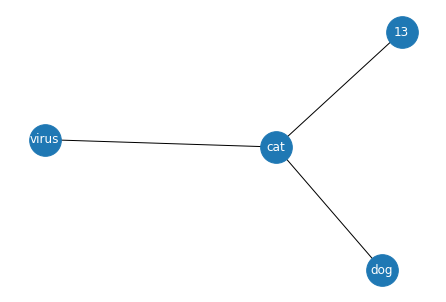

In [69]:
G = nx.Graph()

G.add_nodes_from(['cat','dog','virus',13])

G.add_edge('cat','dog')
G.add_edge('cat','virus')
G.add_edge('cat',13)


nx.draw(G, with_labels=True, font_color='white', node_size=1000)

In [71]:
print(open('D:/FCI/social/FirstCourseNetworkScience/datasets/friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



In [73]:
SG = nx.read_adjlist('D:/FCI/social/FirstCourseNetworkScience/datasets/friends.adjlist')

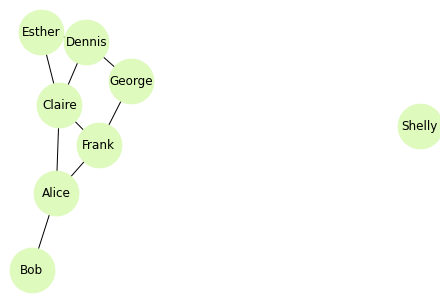

In [82]:
nx.draw(SG, node_size=2000, node_color='#defabc', with_labels=True)

In [83]:
SG.degree('Alice')

3

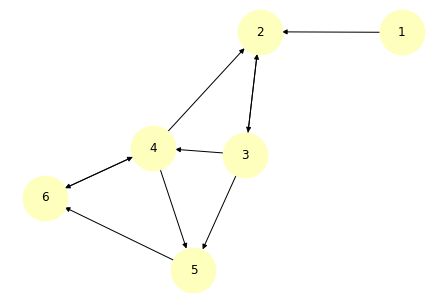

In [90]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, node_color='#feffbc', node_size=2000, with_labels=True)

In [91]:
D.has_edge(1,2)

True

In [92]:
D.has_edge(2,1)

False

In [93]:
print('Successors of 2:', list(D.successors(2)))

print('Predecessors of 2:', list(D.predecessors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]


In [94]:
D.in_degree(2)

3

In [95]:
D.out_degree(2)

1

In [96]:
D.degree(2)

4

In [97]:
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]


In [161]:
G_Graph = nx.Graph()
G_Graph.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])

def get_leaves(g):
    s = [x for x in g.nodes() if g.degree(x)==1]
    print(s)
    return s
get_leaves(G_Graph)
 

['b', 'c']


['b', 'c']

In [162]:
G_adjlist = nx.read_adjlist('D:/FCI/social/FirstCourseNetworkScience/datasets/friends.adjlist')


def max_degree(g):
    max_node = ""
    max_degree = 0
    for (node, val) in g.degree():
        if val > max_degree:
            max_node = node
            max_degree = val
    print((max_node ,max_degree))
    return (max_node ,max_degree)
    
max_degree(G_adjlist)
 

('Claire', 4)


('Claire', 4)

In [170]:
def mutual_friends(g, node_1, node_2):
    edges = [edge for (node,edge) in g.edges(node_1) if edge in [edge_2 for (node ,edge_2) in g.edges(node_2)]]
    print(edges)
    return edges

mutual_friends(G_adjlist, 'Alice', 'Claire') # == ['Frank']
mutual_friends(G_adjlist, 'George', 'Bob') # == []
sorted(mutual_friends(G_adjlist, 'Claire', 'George')) # == ['Dennis', 'Frank']

['Frank']
[]
['Dennis', 'Frank']


['Dennis', 'Frank']